
![alternatvie text](https://www.doc.zuv.fau.de//M/FAU-Logo/01_FAU_Kernmarke/Web/FAU_Kernmarke_Q_RGB_blue.svg)

# Perception in Robotics

Summer Semester 2024, Friedrich-Alexander-Universität Erlangen-Nürnberg

# 3. Exercise - Textures

In this exercise, we will combine filters into filter banks, with the objective to extract textures from a sample image from the [Kodak](https://r0k.us/graphics/kodak/) dataset. First, the **OpenCV** functions are used for the filter bank implementation. Then, the filter banks should be implemented without using the **OpenCV** package, solely relying on [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html).

The solutions for the assignment may be a Python Notebook or .py files. The visual results can be integrated into the notebook or a PDF document.

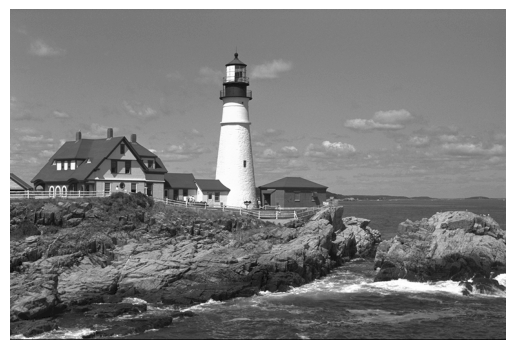

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Image file
base_image_path = '/Users/aruneshsubramanians/Documents/Machine Learning/PIR/kodim21.png'
base_image = cv2.imread(base_image_path, cv2.IMREAD_GRAYSCALE)

# Visualize the image
plt.imshow(base_image, cmap = 'gray')
plt.axis('off')
plt.show()

## A. Gabor Filter Bank OpenCV

In this exercise, the [Gabor filter bank](https://en.wikipedia.org/wiki/Gabor_filter) should be implemented. The Gabor filter is a linear filter used to analyse textures. The filter bank should cover different orientations and scales. Therefore, use the **OpenCV** function *getGaborKernel* to generate the Gabor kernel. Use 4 different values for *ksize* and *theta* to define the filter bank at different scales and orientions. Then, apply the Gabor filter bank to the grayscale sample image by using the **OpenCV** function *filter2D* with the defined Gabor kernels. Visualize the different filters and the results after applying the filters to the image.

Example: [http://amroamroamro.github.io/mexopencv/opencv/gabor_demo.html](http://amroamroamro.github.io/mexopencv/opencv/gabor_demo.html)

In [78]:
# Define reasonable constants for the fixed parameters of the Gabor filter bank.
SIGMA = 5
LMBDA = 0.3
GAMMA = 0
PSI = 0

# Define ksize and theta
ksizes = [5, 11, 17, 23]
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]

In [79]:
# Plot funtion - to plot filters and resultant images (for Gabor filter - with and without using opencv)
def plot_filters(filters):
    """ Plots the Filters
    
    Args
    filters     List of filters
    """

    num_filters = len(filters)
    
    # Plot filters
    plt.figure(figsize = (15, 10))
    for i, filter in enumerate(filters):
        plt.subplot(4, num_filters // 4, i + 1)
        plt.imshow(filter, cmap = 'gray')
        plt.title(f'Filter {i+1}')
        plt.axis('off')
    plt.suptitle('Plot of Filters')
    plt.show()

def plot_results(results):
    """ Plots resultant image of each filter

    Args
    results    List of filtered images
    """

    num_filters = len(results)
    
    # Plot result
    plt.figure(figsize = (15, 10))
    for i, result in enumerate(results):
        plt.subplot(4, num_filters // 4, i + 1)
        plt.imshow(result, cmap = 'gray')
        plt.title(f'Output {i+1}')
        plt.axis('off')
    plt.suptitle('Plot of Resultant images')
    plt.show()

In [80]:
def get_gabor_filter_bank(ksizes, thetas):
    """ Generates a Gabor filter bank i.e., list of Gabor filters/kernels.
    Args
    ksizes      Kernel sizes (i.e., scales) for the kernels in the filter bank (Array of length N).
    thetas      Orientations of the kernels (Array of length N).

    Returns
    filter_bank Kernels of the Gabor filter bank.
    """

    filter_bank = []

    for ksize in ksizes:
        for theta in thetas:
            kernel = cv2.getGaborKernel((ksize,ksize), SIGMA, theta, LMBDA, GAMMA, PSI, ktype = cv2.CV_32F)
            filter_bank.append(kernel)
            
    return filter_bank

In [81]:
def apply_gabor_filter_bank(filter_bank, img):
    """ Apply the Gabor filter bank.
    Args 
    filter_bank List of filters to apply.
    img         Image to apply filters.

    Returns
    features    Features/Textures extracted by applying the Gabor filter bank.
    """

    features = []

    for kernel in filter_bank:
        filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        features.append(filtered_img)
        
    return features

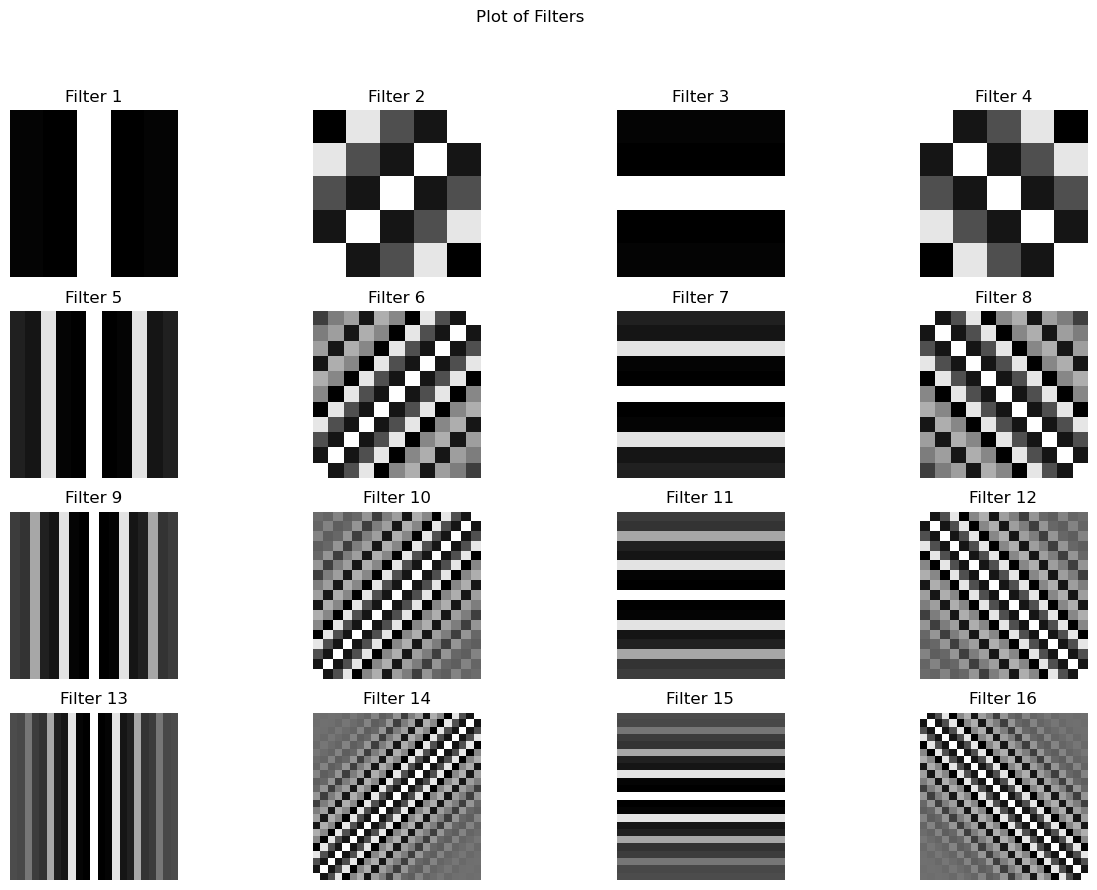

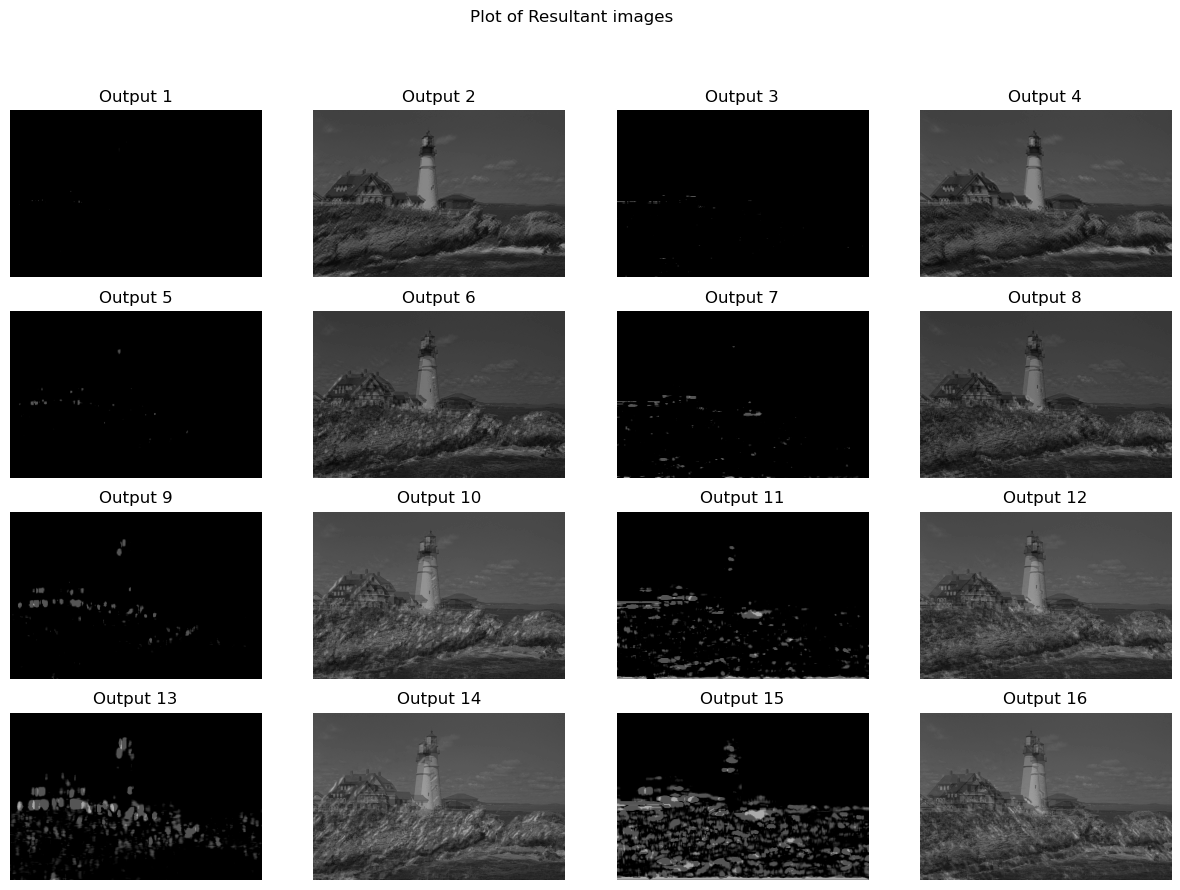

In [82]:
# Generate Gabor filter bank
gabor_filter_bank = get_gabor_filter_bank(ksizes, thetas)

# Apply Gabor filter bank to the image
gabor_features = apply_gabor_filter_bank(gabor_filter_bank, base_image)

# Plot filters and results
plot_filters(gabor_filter_bank)
plot_results(gabor_features)

## B. Gabor Filter Bank 

Now, the Gabor filter bank should be implemented without the **OpenCV** package. Again, visualize the different filters and the results when applied to the grayscale image. You may check your implementation by comparing with the kernels and results from **OpenCV** in A.

**Note:**  The filter has a real and an imaginary component representing orthogonal directions, use the real part for this exercise. Moreover, you may reuse your implementation of the convolution from the previous assignment to perform the filtering. Be aware of potentially different data types of the kernel (e.g., float) and image (e.g., uint8). Furthermore, pixel values might overflow 255. **OpenCV** handles this by clipping values during convolution to the range [0, 255].

In [86]:
def get_gabor_kernel(ksize, sigma, theta, lmbda, gamma, psi):
    """Gabor feature extraction.
    
    Args:
        ksize (int): Kernel size.
        sigma (float): Standard deviation of Gaussian envelope.
        theta (float): Orientation of filter in radians.
        lmbda (float): Sinusoidal wavelength.
        gamma (float): Spatial aspect ratio (ellipticity) of the filter.
        psi (float): Phase offset of the filter in radians.
    
    Returns:
        numpy.ndarray: Resulting kernel.
    """
    y, x = np.meshgrid(np.arange(-ksize // 2 + 1, ksize // 2 + 1), np.arange(-ksize // 2 + 1, ksize // 2 + 1))
    
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    
    g = np.exp(-0.5 * (x_theta**2 / sigma**2 + gamma**2 * y_theta**2 / sigma**2))
    g *= np.cos(2 * np.pi * x_theta / lmbda + psi)
    
    return g

def convolve(image, kernel):
    """Performs convolution of an image with a kernel manually."""
    img_height, img_width = image.shape
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2

    padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode = 'constant', constant_values = 0)
    output = np.zeros_like(image, dtype = np.float64)
    
    for i in range(img_height):
        for j in range(img_width):
            output[i, j] = np.sum(padded_img[i:i+k_height, j:j+k_width] * kernel)
            
    # Clip values to range [0, 255] and convert to uint8
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)

In [84]:
# Apply k-size and theta values
# Generate filters and features
def get_gabor_filter_bank_noCv(ksizes, thetas):
    """Generates a Gabor filter bank"""
    filter_bank = []
    for ksize in ksizes:
        for theta in thetas:
            kernel = get_gabor_kernel(ksize, SIGMA, theta, LMBDA, GAMMA, PSI)
            filter_bank.append(kernel)
    return filter_bank

def apply_gabor_filter_bank_noCv(filter_bank, img):
    """Apply the Gabor filter bank."""
    features = []
    for kernel in filter_bank:
        filtered_img = convolve(img, kernel)
        features.append(filtered_img)
    return features

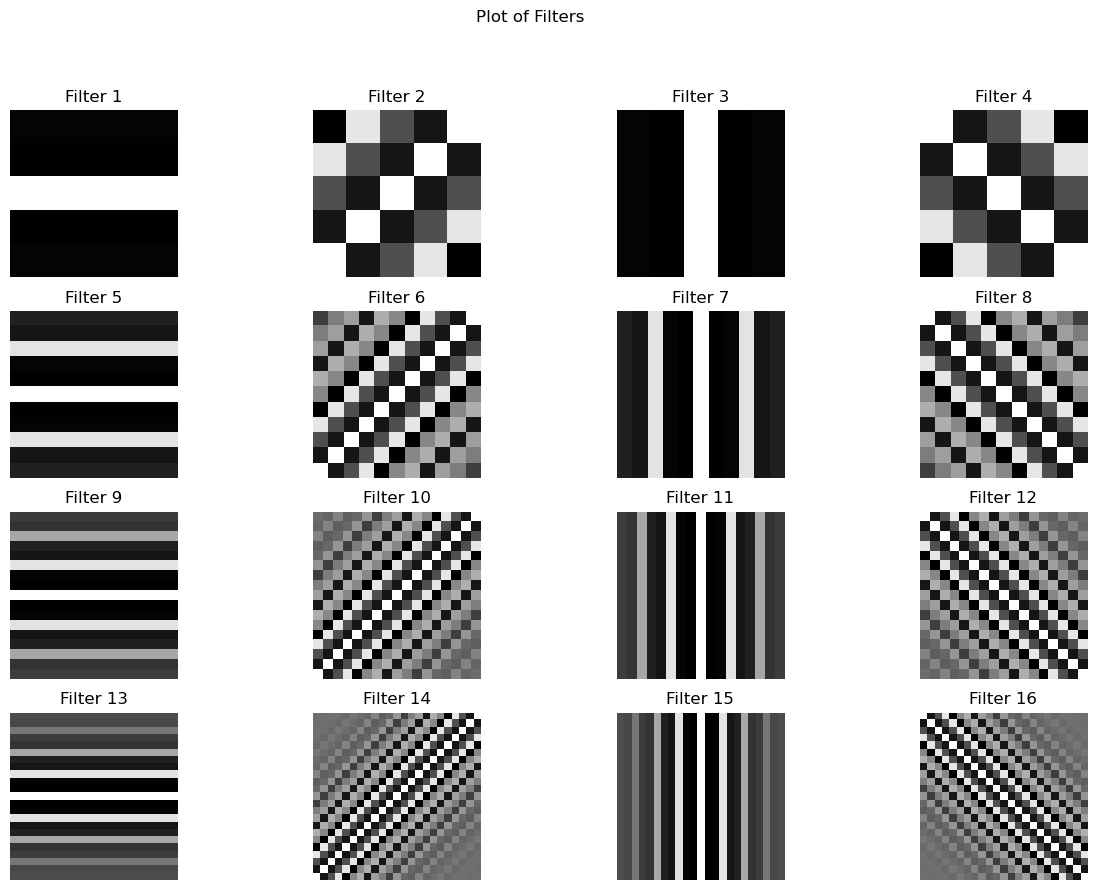

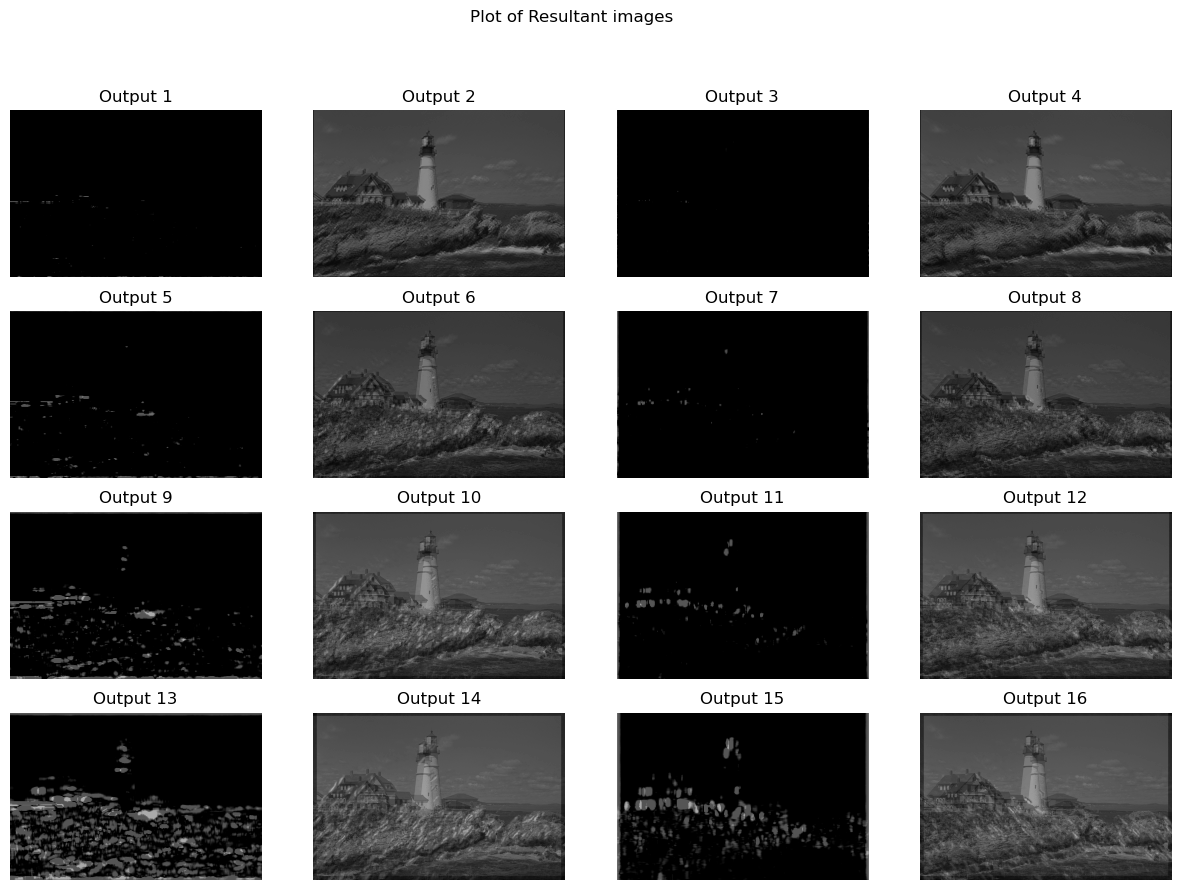

In [85]:
# Generate Gabor filter bank
gabor_filter_bank_noCv = get_gabor_filter_bank_noCv(ksizes, thetas)

# Apply Gabor filter bank to the image
gabor_features_noCv = apply_gabor_filter_bank_noCv(gabor_filter_bank_noCv, base_image)

# Plot the filters and results
plot_filters(gabor_filter_bank_noCv)
plot_results(gabor_features_noCv)

# C. Leung-Malik Filter Bank

In this exercise, the [Leung-Malik](https://people.eecs.berkeley.edu/~malik/papers/LM-3dtexton.pdf) filter bank should be implemented. The Leung-Malik filter bank contains 48 filters of different scales and orientations. It consists of first and second order derivatives of [Gaussians](https://mathworld.wolfram.com/GaussianFunction.html) at 6 orientations and 3 scales. Use $\sigma \in \left\{\sqrt{2}, 2\sqrt{2}, 3\sqrt{2} \right\}$ and $\theta \in \left\{0, \frac{\pi}{6}, \frac{2\pi}{6}, \frac{3\pi}{6}, \frac{4\pi}{6}, \frac{5\pi}{6} \right\}$ to define the filter bank at different scales and orientations, together with an elongation factor of 3 (i.e., $\sigma_x = \sigma$ and $\sigma_y = 3\sigma_x$). 
Furthermore, it encompasses 4 symmetric Gaussians (i.e., no elongation factor) with scales $\sigma$ and
8 [Laplacian of Gaussian (LoG)](https://en.wikipedia.org/wiki/Blob_detection#The_Laplacian_of_Gaussian) filters with $\sigma \in \left\{\sqrt{2}, 2\sqrt{2}, 3\sqrt{2}, 4\sqrt{2}\right\}$ and $3 \sigma$.

Finally, apply the Leung-Malik filter bank to the grayscale sample image. Visualize the different filters and the results when the filters are applied to the image.   

Example: [https://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html](https://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html)

In [99]:
# Import library
from scipy.ndimage import convolve, rotate

# Define scales and thetas
scales = [np.sqrt(2), 2*np.sqrt(2), 3*np.sqrt(2)]
thetas = [0, np.pi/6, 2*np.pi/6, 3*np.pi/6, 4*np.pi/6, 5*np.pi/6]

In [100]:
def gaussian_derivative(sigma, order=1, elongation=3):
    """ Create Gaussian derivative filter. """
    size = int(np.ceil(3 * sigma))
    x, y = np.meshgrid(np.arange(-size, size + 1), np.arange(-size, size + 1))
    
    if order == 1:
        g = -x * np.exp(-(x**2 + (y / elongation)**2) / (2 * sigma**2)) / (2 * np.pi * sigma**4)
    elif order == 2:
        g = (x**2 / sigma**2 - 1) * np.exp(-(x**2 + (y / elongation)**2) / (2 * sigma**2)) / (2 * np.pi * sigma**4)
    
    return g

In [101]:
def get_lm_filter_bank(scales, thetas):
    """ Generates a Leung-Malik filter bank.
    Args
    scales      Kernel sizes (i.e., scales) for the kernels in the filter bank (Array of length 3).
    thetas      Orientations of the first and second order derivative Gaussian kernel (Array of length 6).

    Returns
    filter_bank Kernels of the Leung-Malik filter bank.
    """
    filter_bank = []
    elongation = 3
    
    # First and second order derivatives of Gaussians at different scales and orientations (36 filters)
    for sigma in scales:
        for theta in thetas:
            for order in [1, 2]:
                g_derivative = gaussian_derivative(sigma, order, elongation)
                g_rotated = rotate(g_derivative, np.degrees(theta), reshape=False)
                filter_bank.append(g_rotated)
    
    # Symmetric Gaussians (4 filters)
    for sigma in [np.sqrt(2), 2*np.sqrt(2), 3*np.sqrt(2), 4*np.sqrt(2)]:
        size = int(np.ceil(3 * sigma))
        x, y = np.meshgrid(np.arange(-size, size + 1), np.arange(-size, size + 1))
        g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
        filter_bank.append(g / g.sum())
    
    # Laplacian of Gaussian (LoG) filters (8 filters)
    for sigma in [np.sqrt(2), 2*np.sqrt(2), 3*np.sqrt(2), 4*np.sqrt(2)]:
        size = int(np.ceil(3 * sigma))
        x, y = np.meshgrid(np.arange(-size, size + 1), np.arange(-size, size + 1))
        log = (x**2 + y**2 - 2 * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
        filter_bank.append(log)
        log_3sigma = (x**2 + y**2 - 2 * (3 * sigma)**2) * np.exp(-(x**2 + y**2) / (2 * (3 * sigma)**2)) / (np.pi * (3 * sigma)**4)
        filter_bank.append(log_3sigma)
    
    return filter_bank

In [102]:
def apply_lm_filter_bank(filter_bank, img):
    """ Apply the Leung-Malik filter bank.
    Args 
    filter_bank List of filters to apply.
    img         Image to apply filters.

    Returns
    features    Features/Textures extracted by applying the Leung-Malik filter bank.
    """
    features = []
    
    for kernel in filter_bank:
        filtered_img = convolve(img, kernel, mode='reflect')
        features.append(filtered_img)
        
    return features

In [109]:
def plot_filters(filters):
    """Plots the Filters."""
    num_filters = len(filters)
    plt.figure(figsize=(15, 10))
    for i, filter in enumerate(filters):
        plt.subplot(8, 6, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.title(f'Filter {i+1}')
        plt.axis('off')
    plt.suptitle('Plot of Filters')
    plt.show()

def plot_results(results):
    """Plots resultant image of each filter."""
    num_filters = len(results)
    plt.figure(figsize=(15, 10))
    for i, result in enumerate(results):
        plt.subplot(8, 6, i + 1)
        plt.imshow(result, cmap='gray')
        plt.title(f'Result {i+1}')
        plt.axis('off')
    plt.suptitle('Plot of Resultant images')
    plt.show()

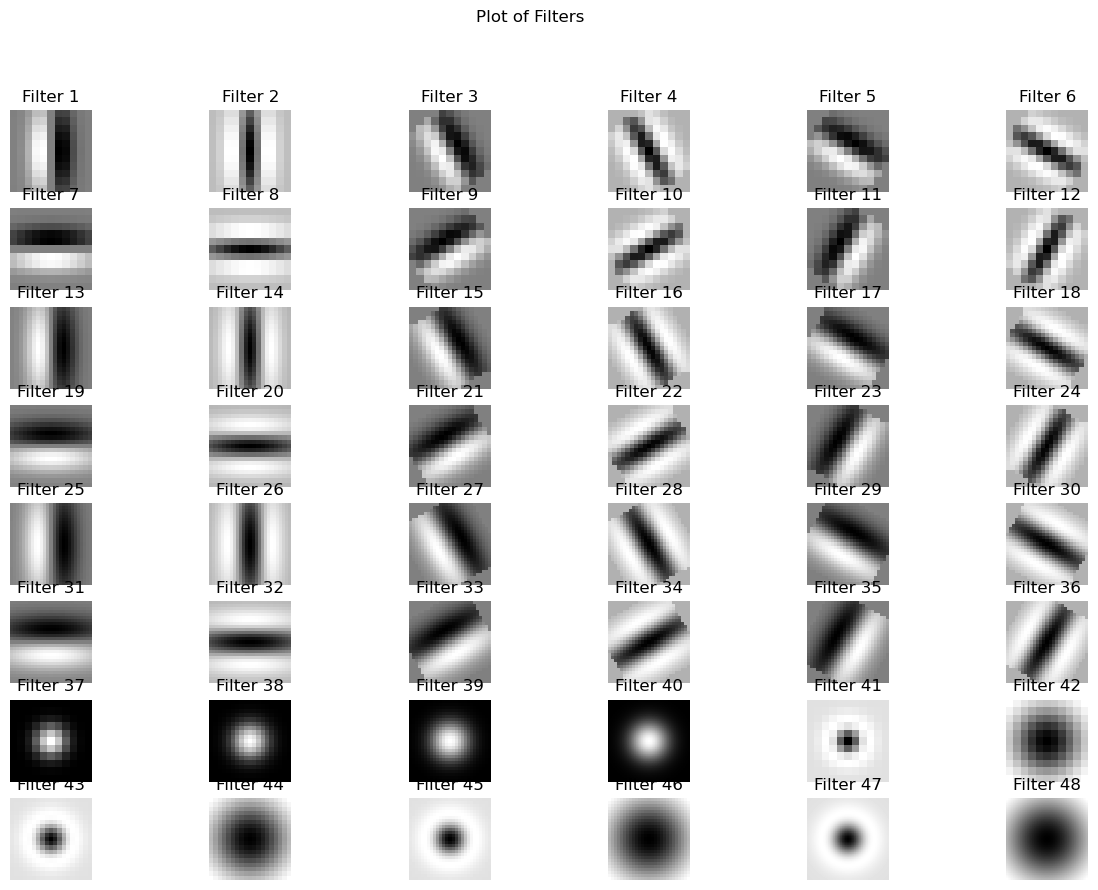

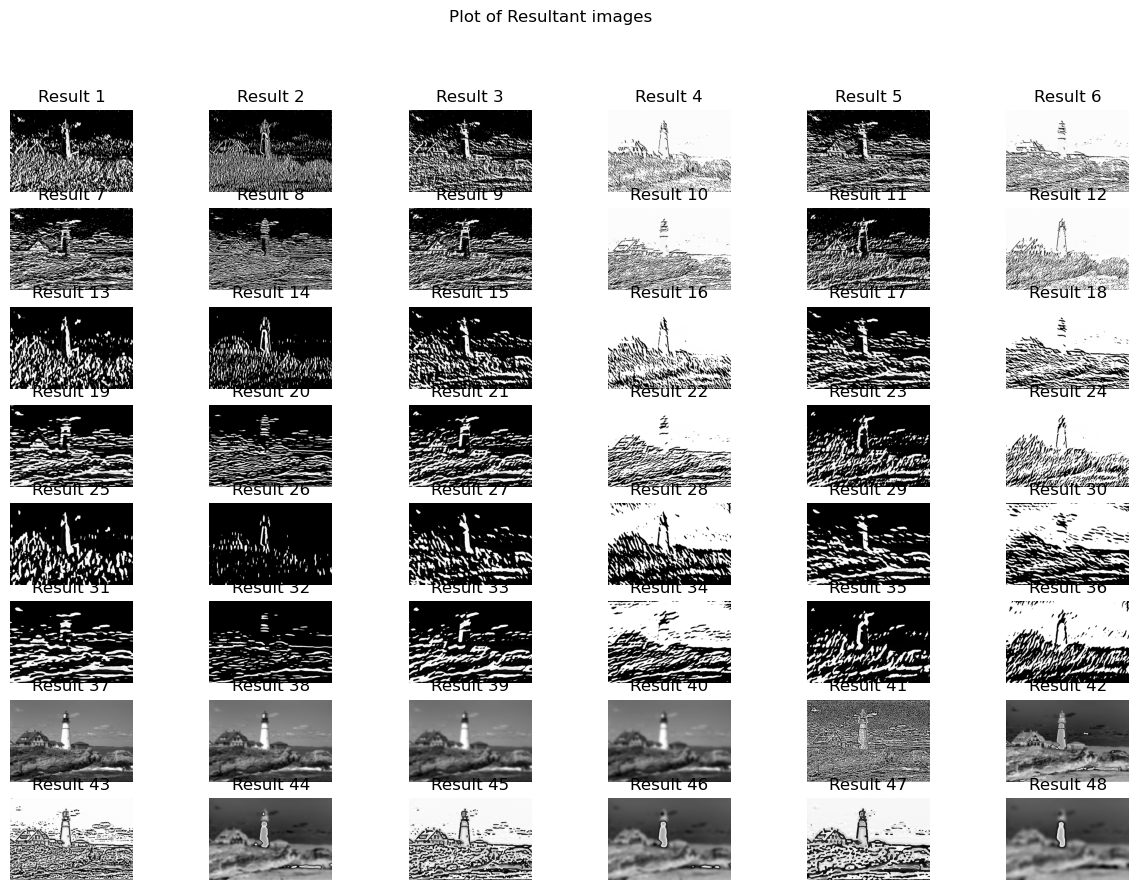

In [110]:
# Create Leung-Malik filter bank
lm_filter_bank = create_lm_filter_bank(scales, thetas)

# Apply filter bank to the image
lm_features = apply_lm_filter_bank(lm_filter_bank, base_image)

plot_filters(lm_filter_bank)
plot_results(lm_features)